In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2 as cv

In [140]:
img1a = cv.imread('05.Morfologia/Image_(1a).png')
img1b = cv.imread('05.Morfologia/Image_(1b).png')
img2a = cv.imread('05.Morfologia/Image_(2a).jpg')
img3a = cv.imread('05.Morfologia/Image_(3a).jpg')
img4a = cv.imread('05.Morfologia/Image_(4a).jpg')

In [171]:
def getMinMax(arr):
    # return [min(arr), max(arr)]
    return [0, 255]


def histogram(arr):
    h_arr = np.zeros(256)
    g_arr = ["" for x in range(256)]


    for x in range(len(arr)):
        h_arr[arr[x]] += 1


    max_arr = max(h_arr)
    for x in range(len(h_arr)):
        g_arr[x] = (str(x) + "\t: " + str("|" * int((h_arr[x] * 100)/int(max_arr)) + "\n"))


    return [h_arr, g_arr, getMinMax(arr)]


def printHistogramTxt(save_path, g_arr, p_min_max):
    with open((save_path.split(".")[0] + "_histogram.txt"), "w") as text_file:
        text_file.write("Histograma da imagem: " + save_path + "\n\n")
        for x in range(len(g_arr)):
            text_file.write(g_arr[x])


def printHistogramGraph(save_path, h_arr):
    plt.bar([x for x in range(256)], h_arr)
    plt.title("Histograma")
    plt.xlabel("Pixel")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.savefig(save_path.split(".")[0] + "_histogram.jpg")
    plt.clf()

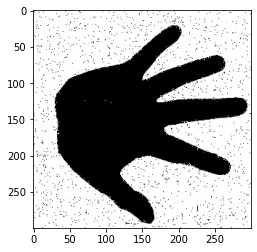

In [121]:
plt.imshow(img2a)
plt.show()

In [176]:
img_array_2 = np.asarray(img2a)
h_arr,g_arr,p_min_max = histogram(img_array_2)

printHistogramGraph("05.Morfologia/hist_image_(2a).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

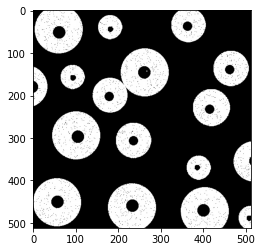

In [126]:
plt.imshow(img3a)
plt.show()

In [177]:
img_array_3 = np.asarray(img3a)
h_arr,g_arr,p_min_max = histogram(img_array_3)

printHistogramGraph('05.Morfologia/hist_image_(3a).jpg',h_arr)

<Figure size 432x288 with 0 Axes>

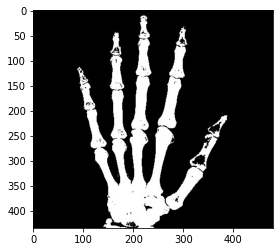

In [127]:
plt.imshow(img4a)
plt.show()

In [178]:
img_array_4 = np.asarray(img4a)
h_arr,g_arr,p_min_max = histogram(img_array_4)

printHistogramGraph('05.Morfologia/hist_image_(4a).jpg',h_arr)

<Figure size 432x288 with 0 Axes>

## Erosão

### A⊝B={ Z|(B ̂_z )∈A}

##### Isso indica que a erosão de A por B é um conjunto de todos os pontos que B, transladado (deslocado por Z), é um subconjunto de A que B está inteiramente contido em A. A erosão reduz o número de pixels do limite do objeto

In [120]:
def erosion(image, frame):

    # could not use because, too many values to unpack (expected 2)
    # m,n= image.shape 
    m = len(image)
    n = len(image[0])
    # shape = []
    # shape = np.zeros((m,n))
    
    # Defined structuring element
    # frame = 11,15,45 - Different sizes of the structuring element
    SE = np.ones((frame,frame), dtype=np.uint8)
    constant = (frame-1)//2

    #Define new image
    img_= []
    img_ = np.zeros((m,n))
    imgErode= np.zeros((m,n), dtype=np.uint8)

    for i in range(m):
        for j in range(n):
            if image[i,j].all() > 0:
                imgErode[i,j] = 1

    #Erosion without using inbuilt cv2 function for morphology
    for i in range(constant, m-constant):
        for j in range(constant,n-constant):
            temp = imgErode[i-constant:i+constant+1, j-constant:j+constant+1]
            result = temp*SE
            img_[i,j] = np.min(result)
    
    return img_

In [184]:
img_erosion = erosion(img2a, 3)

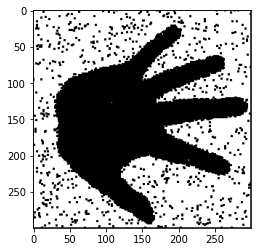

In [187]:
plt.imshow(img_erosion, cmap="gray")
cv.imwrite('05.Morfologia/results/New_Image_(2a).jpg', img_erosion)
plt.show()

In [181]:
new_img_2a = Image.open("05.Morfologia/results/New_Image_(2a).jpg")
new_img_array_2 = np.asarray(new_img_2a)
h_arr,g_arr,p_min_max = histogram(new_img_array_2)

printHistogramGraph('05.Morfologia/hist_image_(2a).jpg',h_arr)

<Figure size 432x288 with 0 Axes>

## Dilatação

### A⊕B={ Z|[(B ̂_z )∩A]∈A}

##### It fills the holes and broken areas.

##### Na equação acima, A é a imagem e B é o elemento estruturante. Na equação acima, (B ̂_z) significa refletir sobre B sobre sua origem e deslocá-la por Z. Portanto, a dilatação de A com B é o conjunto de todos os deslocamentos, Z, de modo que (B ̂_z) e A se sobrepõem por pelo menos um elemento

In [161]:
def dilation(image):
    
    #Acquire size of the image
    p = len(image)
    q = len(image[0])
    # p,q= img2.shape
    
    #Define new image to store the pixels of dilated image
    imgDilate = []
    imgDilate= np.zeros((p,q))

    #Define the structuring element 
    SED = np.array([[0,1,0], [1,1,1],[0,1,0]])
    constant = 1
    #Dilation operation without using inbuilt CV2 function
    for i in range(constant, p-constant):
        for j in range(constant, q-constant):
            temp = image[i - constant:i+constant+1, j - constant:j+constant+1]
            result = temp * SED
            imgDilate[i,j] = np.max(result)
    return imgDilate
    # plt.imshow(imgDilate,cmap="gray")
    # cv.imwrite("Dilated.png", imgDilate)

In [164]:
img_dilation3 = dilation(img3a)

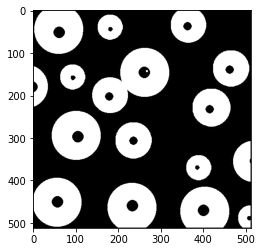

In [169]:
plt.imshow(img_dilation3, cmap="gray")
cv.imwrite('05.Morfologia/results/New_Image_(3a).jpg', img_dilation3)
plt.show()

In [188]:
new_img_3a = Image.open("05.Morfologia/results/New_Image_(3a).jpg")
new_img_array_3 = np.asarray(new_img_3a)
h_arr,g_arr,p_min_max = histogram(new_img_array_3)

printHistogramGraph('05.Morfologia/hist_image_(3a).jpg',h_arr)

<Figure size 432x288 with 0 Axes>

In [166]:
img_dilation4 = dilation(img4a)

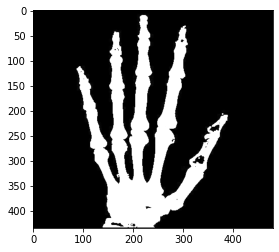

In [170]:
plt.imshow(img_dilation4, cmap="gray")
cv.imwrite('05.Morfologia/results/New_Image_(4a).jpg', img_dilation4)
plt.show()

In [189]:
new_img_4a = Image.open("05.Morfologia/results/New_Image_(4a).jpg")
new_img_array_4 = np.asarray(new_img_4a)
h_arr,g_arr,p_min_max = histogram(new_img_array_4)

printHistogramGraph('05.Morfologia/hist_image_(4a).jpg',h_arr)

<Figure size 432x288 with 0 Axes>